## Figures for Precambrian Research Submission - OFP
## **NPZ Chemostratigraphic Compilation**
  
Connor S. van Wieren, 2023

# Notes
- Death valley is similar stratigraphic height to OFP! short, sub 100m
      

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
import matplotlib.transforms as transforms
from matplotlib import colors
import matplotlib
import pandas as pd
import seaborn as sns
from VanStrat.VanStrat_simple import *
import string
from ipywidgets import interactive, interact
from scipy.ndimage import rotate
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec
import pickle
import dill

## for reloading updated .py files without restarting kernel; 2 means to reload all imports, don't need to run this every time. when i save a .py file its auto reloaded
%load_ext autoreload
%autoreload 2 

import sys
sys.path.insert(0, '/Users/cvanwieren/Library/CloudStorage/Dropbox/GitHub/Useful_Code')
from funcs import *
%matplotlib inline

plt.rcParams['figure.figsize'] = (5.5, 3.5)
%config InlineBackend.figure_format='retina'

sns.set_style('ticks',{'axes.edgecolor':'.3',
                       'xtick.color':'.3',
                       'ytick.color':'.3',
                       'text.color': '.3',
                       'axes.labelcolor':'.3',
                       'axes.grid': False,
                       'grid.linestyle': u'-.'})

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)

fig_dir = '/Users/cvanwieren/Library/CloudStorage/Dropbox/GitHub/Publications/OFP_PC/img/'

# load pickle
filename = './pickles/ofp_data.pkl'
dill.load_session(filename)

# read excels
secs = pd.read_excel(home+'./sections/sections_com.xlsx') # sections 
# get rid of secs duplicates
secs = secs.dropna(subset=['d13c_carb']).reset_index(drop=True)

# Lump all Fold limbs for GSM Type into one section
secs.loc[secs['index'].str.contains('GSM Type'),'index'] = 'GSM Type'

clasts = pd.read_excel(home+'./ICTs/icts_com.xlsx') # ICT clasts
nods = pd.read_excel(home+'./hand_samples/nodules.xlsx') # GSM Authigenic Nodules
fans = pd.read_excel(home+'./hand_samples/fans.xlsx') # WMM aragonite fan clasts

# combine clasts and fans
clasts = pd.concat([clasts,fans]).reset_index(drop=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
ofp_shur = pd.read_csv('/Users/cvanwieren/Library/CloudStorage/Dropbox/GitHub/vanWieren_OFP_PrecRes/data/sections/ofp_shur.csv')
NPZ = pd.read_csv('/Users/cvanwieren/Library/CloudStorage/Dropbox/Documents/University/PhD/Lit Data/Husson_Ahm_Neoproterozoic Compilation/Neoprot_compilation_expanded.csv')

In [12]:
locs = {'brazil':'Brazil',
        'c australia':'C. Australia',
        'death valley':'Death Valley',
        'mongolia':'Mongolia',
        'n ethiopia':'N. Ethiopia',
        'n namibia':'N. Namibia',
        'n norway':'N. Norway',
        'nw canada':'N.W. Canada',
        'oman':'Oman',
        's australia':'S. Australia',
        's china':'S. China',
        's namibia':'S. Namibia',
        'scotland':'Scotland',
        'svalbard':'Svalbard'}

NPZ['locality']=NPZ['locality'].map(locs)

loc_order = ['Brazil','C. Australia','S. Australia','N.W. Canada','S. China','Death Valley','N. Ethiopia','Mongolia','N. Namibia','S. Namibia','N. Norway',
            'Oman','Scotland','Svalbard']

In [13]:
busch = pd.read_excel('/Users/cvanwieren/Library/CloudStorage/Dropbox/Documents/University/PhD/Lit Data/Busch Shuram Data (2022)/busch_2022_supps.xlsx')
busch = busch.rename(columns={'δ13C':'d13c_carb','δ18O':'d18o_carb','Sr/Ca (mmol/mol)':'Sr_mmol_molCa','Mn/Ca (μmol/mol)':'Mn_umol_molCa',
                             'Mg/Ca (mmol/mol)':'Mg_mmol_molCa','δ26Mg':'d26Mg_carb','δ25Mg':'d25Mg_carb',
                             'U/Ca (μmol/mol)':'U_umol_molCa','height (m)':'sample_height'})
busch['Mn_mmol_molCa'] = busch['Mn_umol_molCa']/1000
secs['Mn/Sr (mmol/mmol)'] = secs['Mn_mmol_molCa']/secs['Sr_mmol_molCa']
clasts['Mn/Sr (mmol/mmol)'] = clasts['Mn_mmol_molCa']/clasts['Sr_mmol_molCa']

# weird zero value so make nan
busch.loc[busch['U_umol_molCa']==0,'U_umol_molCa'] = np.nan

In [14]:
busch.columns

Index(['location', 'section', 'mineralogy', 'water depth', 'sample_height',
       'd13c_carb', 'd18o_carb', '44/40Ca', '44/42Ca', '44/43Ca', 'd26Mg_carb',
       'd25Mg_carb', 'Sr_mmol_molCa', 'Mg_mmol_molCa', 'Mn_umol_molCa',
       'U_umol_molCa', 'Mn/Sr (mmol/mmol)', 'Mn_mmol_molCa'],
      dtype='object')

## Placing OFP and CCK $\delta^{13}$C curve into global Shuram composite (Also going to add the Peru dataset (Busch et al., 2022))
- will need to integrate this into the NPZ dataframe so the legend is clean

In [15]:
ofp_shur.columns

Index(['Unnamed: 0', 'index', 'member', 'thickness', 'lithology', 'facies',
       'grade', 'features', 'sample_name', 'sample_height', 'sample_facies',
       'sample_features', 'facies_simplified', 'sample_facies_simplified',
       'trace_facies_simplified', 'sample_lith', 'trace_facies', 'd13c_carb',
       'd18o_carb', 'Li_umol_molCa', 'Na_mmol_molCa', 'Mg_mmol_molCa',
       'Al_mmol_molCa', 'K_mmol_molCa', 'V_umol_molCa', 'Mn_mmol_molCa',
       'Fe_mmol_molCa', 'Rb_umol_molCa', 'Sr_mmol_molCa', 'Th_umol_molCa',
       'U_umol_molCa', 'sample_height_scaled'],
      dtype='object')

In [16]:
## isolate parts of ofp_shur, lots of copys for settingcopywarning stuff...

# tlm only
tlm1 = ofp_shur[(ofp_shur['sample_height_scaled']>0)&(ofp_shur['sample_height_scaled']<150)]
tlm = tlm1.copy()

# wmm only
wmm1 = ofp_shur.copy()
wmm2  = wmm1[wmm1['sample_height_scaled']>=150]
wmm = wmm2.copy()

# corral creek only
cck1 = ofp_shur.copy()
cck2 = ofp_shur[ofp_shur['sample_height_scaled']<0]
cck = cck2.copy()


<Axes: title={'center': 'Busch Peru'}, xlabel='d13c_carb', ylabel='sample_height_scaled'>

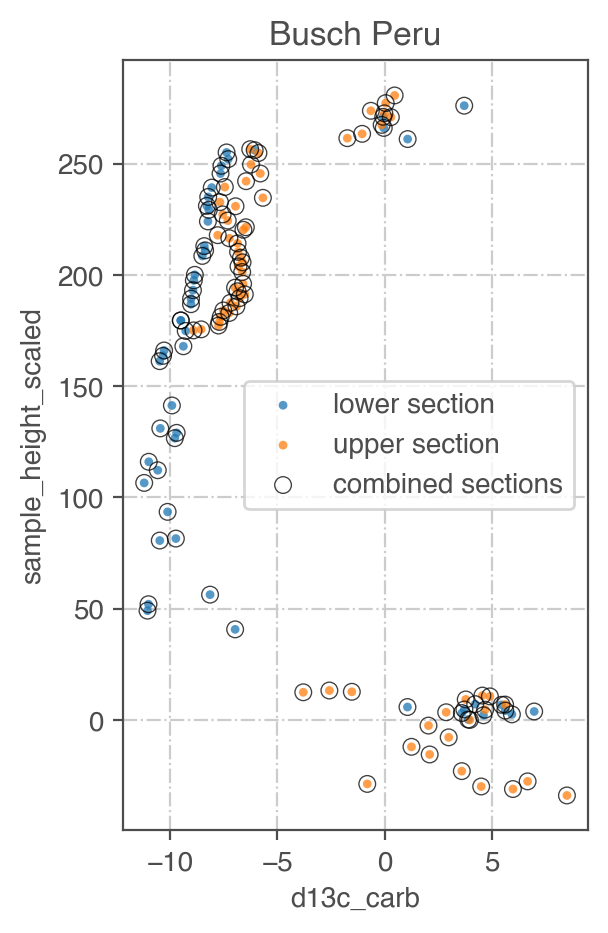

In [17]:
# isolate peru from busch
busch.head()
peru = busch[busch['location']=='Peru'].reset_index(drop=True)
# test plot
fig,ax = plt.subplots(figsize=(3,5))
ax.grid()
#sns.scatterplot(data=peru,x='d13c_carb',y='sample_height_scaled',edgecolor='none',alpha=0.75)
ax.set_title('Busch Peru')
# seems to be two sections worth of data, will probably just use the lower one
peru_l = peru[peru['sample_height']<400].copy()
peru_u = peru[peru['sample_height']>400].copy()
per_s = 1.15
per_b = -800
peru_l['sample_height_scaled'] = peru_l['sample_height']
peru_u['sample_height_scaled'] = per_s*peru_u['sample_height']+(per_s*per_b)
sns.scatterplot(x=peru_l['d13c_carb'],y=peru_l['sample_height_scaled'],edgecolor='none',alpha=0.75,label='lower section',s=10)
sns.scatterplot(x=peru_u['d13c_carb'],y=peru_u['sample_height_scaled'],edgecolor='none',alpha=0.75,label='upper section',s=10)

peru_t = pd.concat([peru_l,peru_u],ignore_index=True)
sns.scatterplot(x=peru_t['d13c_carb'],y=peru_t['sample_height_scaled'],edgecolor='k',facecolor='none',alpha=0.75,label='combined sections')


In [18]:
#### from ipywidgets import interactive, interact
from IPython.display import display
 # https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

# set lims
stretch = (0,.1,.001)
lims = (560,600,.25)

@interact(pb=lims,ps=stretch,cb=lims,cs=stretch,tb=lims,ts=stretch,wb=lims,ws=stretch)
def f(pb,ps,cb,cs,tb,ts,wb,ws):
    """
    
    """
    fig,ax = plt.subplots(figsize=(4,6))
    ymin=576
    ymax=565
    sub = NPZ[(NPZ['age']>ymax)&(NPZ['age']<ymin)]
    # npz comp
    sns.scatterplot(data=sub,y='age',x='d13c',edgecolor='none',hue='locality',palette='tab10',ax=ax,legend=True,zorder=2,clip_on=True,s=15,alpha=0.7)
    
    # format
    ax.invert_yaxis()
    ax.grid()

    # begin stretching ofp (need *-1 to get on this scale)
    cck['stretched'] = -cs*cck['sample_height_scaled']+cb
    tlm['stretched'] = -ts*tlm['sample_height_scaled']+tb
    wmm['stretched'] = -ws*wmm['sample_height_scaled']+wb

    # begin stretching peru (need *-1 to get on this scale)
    peru_t['stretched'] = -ps*peru_t['sample_height_scaled']+pb
    
    # add ofp
    sns.scatterplot(data=cck,y='stretched',x='d13c_carb',edgecolor='none',facecolor='r',ax=ax,legend=False,zorder=2,clip_on=True,s=10,alpha=.75,label='cck')
    sns.scatterplot(data=tlm,y='stretched',x='d13c_carb',edgecolor='none',facecolor='r',ax=ax,legend=False,zorder=2,clip_on=True,s=10,alpha=.75,label='tlm')
    sns.scatterplot(data=wmm,y='stretched',x='d13c_carb',edgecolor='none',facecolor='r',ax=ax,legend=False,zorder=2,clip_on=True,s=10,alpha=.75,label='wmm')

    # add peru
    sns.scatterplot(data=peru_t,y='stretched',x='d13c_carb',edgecolor='none',facecolor='k',ax=ax,legend=False,zorder=2,clip_on=True,s=10,alpha=.75,label='Peru')
    ax.legend(fontsize=6,ncol=1,framealpha=1,loc='center right')

    # set lims
    ax.set_ylim(ymin,ymax)
    
    # alans new gsm age (roughly)
    ax.axhline(567,color='k',ls='--')
    ax.axhspan(567+5,567-5,color='k',alpha=0.075,lw=0)
    ax.text(-13.5,566.75,'GSM Age\n2$\sigma$ (grey)')

    l = f'peru: base = {pb}, stretch = {ps}; cck: base = {cb}, stretch = {cs}; tlm: base = {tb}, stretch = {ts}; wmm: base = {wb}, stretch = {ws}'
    return l


interactive(children=(FloatSlider(value=580.0, description='pb', max=600.0, min=560.0, step=0.25), FloatSlider…

- Note: the death valley, and Oman sections are short like OFP and yet are stretched to match d13c, so I think I am fine in making this call (see busch et al., 2022)
- [x] need to add Corral Creek to show initiation

In [19]:
# write wiggle-match results to variable: fmt: peru: base, stretch, cck: base, stretch, tlm: base, stretch, wmm: base, stretch
res = [574.25,0.025,572.75,0.027000000000000003,574.0,0.042,569.25,0.009000000000000001]
pb = res[0]
ps = res[1]
cb = res[2]
cs = res[3]
tb = res[4]
ts = res[5]
wb = res[6]
ws = res[7]

In [20]:
# reconstruct these heights as ages and make into dfs

# cck
cck_df = pd.DataFrame(columns=NPZ.columns)
cck_df['age'] = -cs*cck['sample_height_scaled']+cb
cck_df['strat_name'] = 'Corral Creek Fm.'
cck_df['d13c'] = cck['d13c_carb']
cck_df['d18o'] = cck['d18o_carb']

# tlm
tlm_df = pd.DataFrame(columns=NPZ.columns)
tlm_df['age'] = -ts*tlm['sample_height_scaled']+tb
tlm_df['strat_name'] = 'OFP - Temple Lake Member'
tlm_df['d13c'] = tlm['d13c_carb']
tlm_df['d18o'] = tlm['d18o_carb']

# wmm
wmm_df = pd.DataFrame(columns=NPZ.columns)
wmm_df['age'] = -ws*wmm['sample_height_scaled']+wb
wmm_df['strat_name'] = 'OFP - Whitehorn Mountain Member'
wmm_df['d13c'] = wmm['d13c_carb']
wmm_df['d18o'] = wmm['d18o_carb']

# combine together for all ofp samples
ofp_comp_scaled = pd.concat([cck_df,tlm_df,wmm_df],ignore_index=True)
ofp_comp_scaled['locality'] = 'S. Canadian Cordillera\n(this study)'
ofp_comp_scaled['ref'] = 'van Wieren et al., 202x'

# add peru
peru_df = pd.DataFrame(columns=NPZ.columns)
peru_df['age'] = -ps*peru_t['sample_height_scaled']+pb
peru_df['strat_name'] = 'San Juan Fm.'
peru_df['d13c'] = peru_t['d13c_carb']
peru_df['d18o'] = peru_t['d18o_carb']
peru_df['locality'] = 'Peru'
peru_df['ref'] = 'Busch et al., 2022'


In [21]:
# combine my scaled data with NPZ
total_comp = pd.concat([NPZ,peru_df,ofp_comp_scaled],ignore_index=True)
set(total_comp.locality)

{'Brazil',
 'C. Australia',
 'Death Valley',
 'Mongolia',
 'N. Ethiopia',
 'N. Namibia',
 'N. Norway',
 'N.W. Canada',
 'Oman',
 'Peru',
 'S. Australia',
 'S. Canadian Cordillera\n(this study)',
 'S. China',
 'S. Namibia',
 'Scotland',
 'Svalbard'}

### Copy of the dataframe with cartoon OFP data at 607 for panel C in figure

In [201]:
new_df = sub1.copy() # make copy of dataframe
new_df.head()

,locality,strat_name,d13c,d18o,age,ref
4576,Oman,Buah Fm,-3.51,NaN,561.04,Petroleum Development Oman
4577,Oman,Buah Fm,-0.47,NaN,562.70,Petroleum Development Oman
4578,Oman,Buah Fm,-0.64,NaN,562.70,Petroleum Development Oman
4579,Oman,Buah Fm,-0.19,NaN,562.78,Petroleum Development Oman
4580,Oman,Buah Fm,-0.52,NaN,562.78,Petroleum Development Oman


In [202]:
set(new_df['strat_name'])

{' basal Khufai Fm  ',
 'Blueflower Fm',
 'Buah Fm',
 'Corral Creek Fm.',
 'Doushantuo Fm (Member II)',
 'Doushantuo Fm (Member III)',
 'Doushantuo Fm (Member IV)',
 'Gametrail Fm',
 'Khufai Fm',
 'Nadaleen Fm',
 'OFP - Temple Lake Member',
 'OFP - Whitehorn Mountain Member',
 'San Juan Fm.',
 'Shuram Fm',
 'buah',
 'johnnie',
 'khufai',
 'shuram',
 'ub',
 'wonoka'}

In [203]:
new_df_ofp = new_df[new_df['strat_name'].str.contains('OFP|Corral')]
new_df_no_ofp = new_df[~new_df['strat_name'].str.contains('OFP|Corral')]

/var/folders/ss/pfgdfm2x7_s4cyw2v0b_t7q80000gn/T/ipykernel_16156/3687708992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_ofp['new_age'] = 1.5*new_df_ofp['age']-242.5


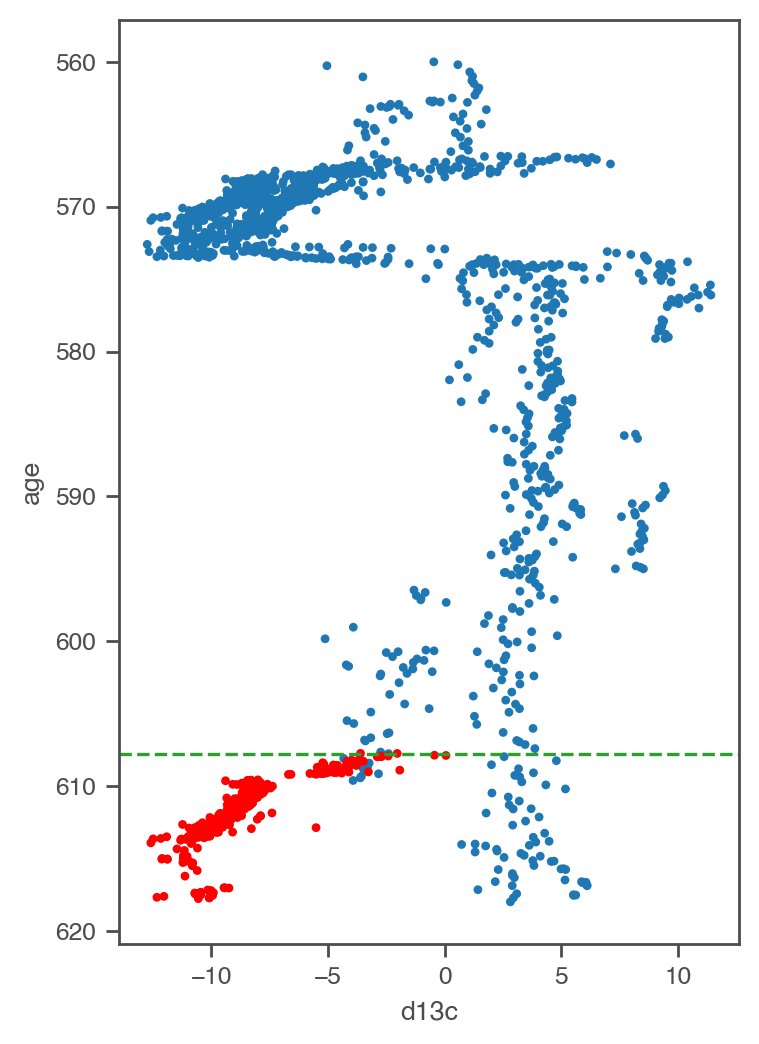

In [204]:
plt.figure(figsize=(4,6))

# move ofp down
new_df_ofp['new_age'] = 1.5*new_df_ofp['age']-242.5

sns.scatterplot(data=new_df,y='age',x='d13c',edgecolor='none',legend=False,zorder=2,clip_on=True,s=10)
sns.scatterplot(data=new_df_ofp,y='new_age',x='d13c',color='r',edgecolor='none',legend=False,zorder=2,clip_on=True,s=10)
plt.gca().invert_yaxis()
plt.gca().axhline(607.8,ls='--',color='tab:green')

## Age Constraints for Windermere (Without Boag Data or new OFP Ages) and Shuram

In [210]:
# subset out dataframes for plot
tlim = 558
blim = 618 # 615

carb_targ = total_comp

sh = carb_targ[(carb_targ['age']>567.3)&(carb_targ['age']<574)] # isolate shuram
sub = carb_targ[~((carb_targ['age']>567)&(carb_targ['age']<574))] # everything else
subb = sub.loc[((carb_targ['age']>tlim)&(carb_targ['age']<blim))] # everything else but without data outside of plot
sub1 = carb_targ[(carb_targ['age']<blim)&(carb_targ['age']>tlim)]

In [211]:
# cm = ['#023eff',
#      '#ff7c00',
#      '#1ac938',
#      '#e8000b', 
#      '#8b2be2',
#      '#f14cc1',
#      '#00d7ff', 
#      'purple']
# cm = list(sns.color_palette('bright',n_colors=len(t)).as_hex())
# cm = sns.color_palette(cm).as_hex()

In [212]:
t = set(sub1.locality)
cm = sns.color_palette('deep',n_colors=int(len(t))).as_hex()
cm[-1] = 'purple' # ofp
#cm[-3] =  'dodgerblue'
cm

['#4c72b0',
 '#dd8452',
 '#55a868',
 '#c44e52',
 '#8172b3',
 '#937860',
 '#da8bc3',
 'purple']

In [231]:
t = set(sub1.locality)
cm1 = sns.color_palette('deep',n_colors=int(len(t))-1).as_hex()
#cm1[-1] = 'purple' # ofp
#cm1[-3] =  'dodgerblue'
cm1

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3']

In [213]:
set(sub1.locality)

{'Death Valley',
 'Mongolia',
 'N.W. Canada',
 'Oman',
 'Peru',
 'S. Australia',
 'S. Canadian Cordillera\n(this study)',
 'S. China'}

In [214]:
# set order
od = ['Mongolia',
      'Oman',
      'Peru',
      'S. China',
      'Death Valley',
      'S. Australia',
      'N.W. Canada',
      'S. Canadian Cordillera\n(this study)']

## Publication Figure

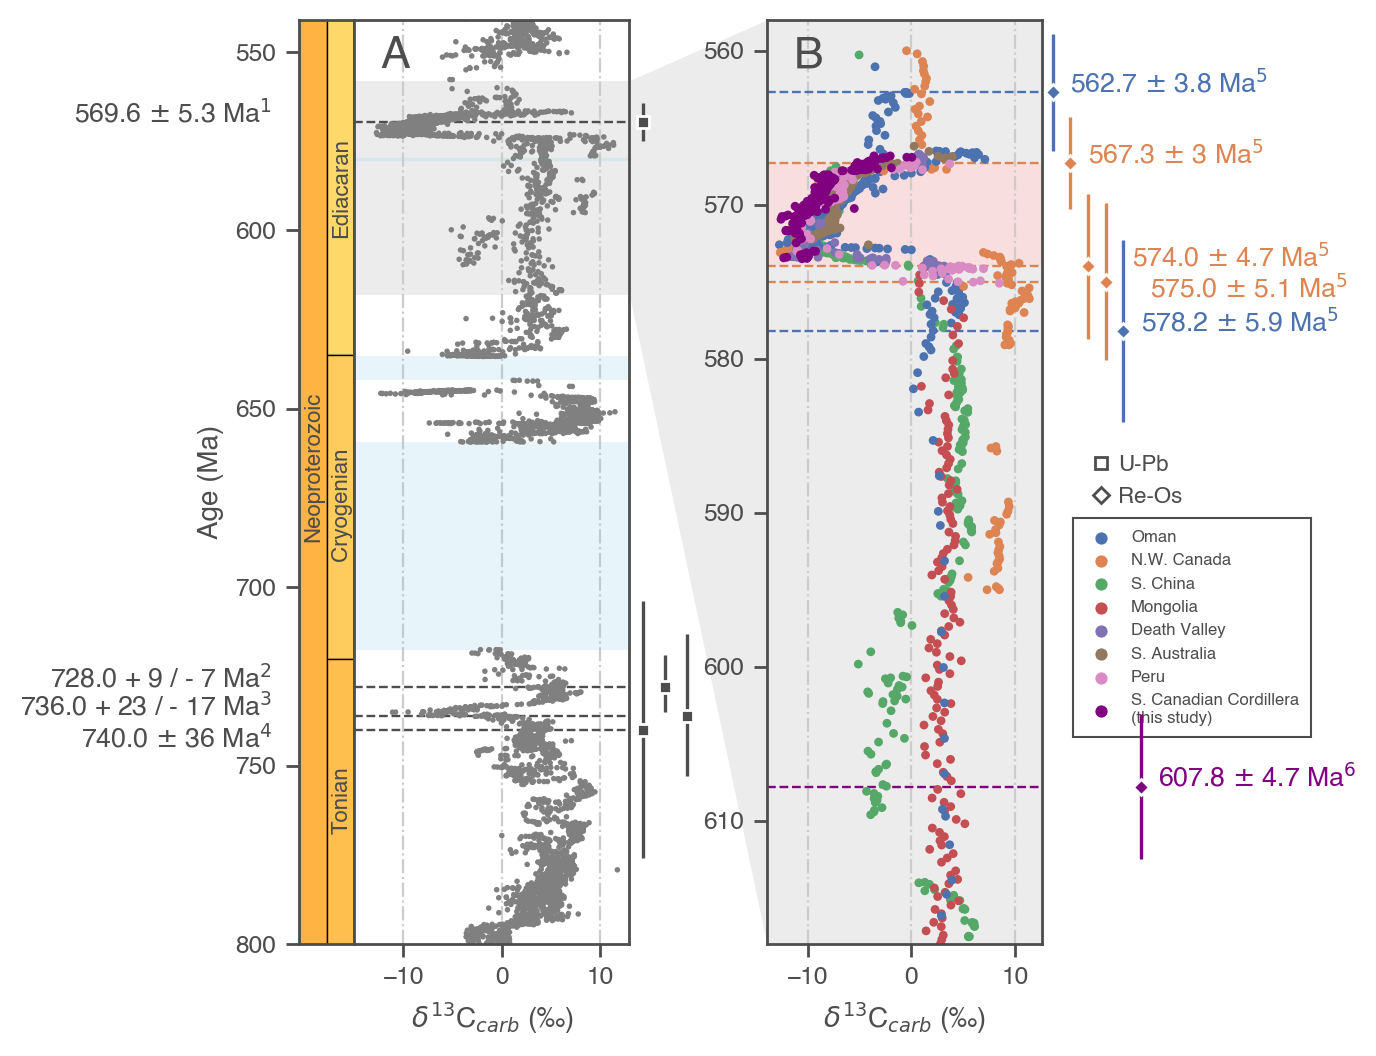

In [215]:
sns.set_context('paper')

fig,ax = plt.subplots(1,5,figsize=(5.5,6),width_ratios=(0.2,1,.5,1,.4),sharey=False)
plt.subplots_adjust(wspace=0)

# carbon isotopes for neoproterozoic including ofp
sns.scatterplot(data=carb_targ,y='age',x='d13c',edgecolor='none',ax=ax[1],legend=False,zorder=2,clip_on=True,s=4,color='grey')

# carbon isotopes for ediacaran
sns.scatterplot(data=sub1,y='age',x='d13c',hue='locality',palette=cm,edgecolor='none',ax=ax[3],legend=True,zorder=2,clip_on=True,s=10)
# everything not shuram
#sns.scatterplot(data=subb,y='age',x='d13c',style='locality',edgecolor='none',ax=ax[3],legend=False,zorder=2,clip_on=True,s=10,color='darkgrey')

# highlight Shuram
ax[3].axhspan(574,567.3,alpha=0.15,zorder=0,color='tab:red',lw=0)

# locality
leg = ax[3].legend(framealpha=1,fontsize=6,loc=3,markerscale=0.75,bbox_to_anchor=(1.1,0.22))
frame = leg.get_frame()
frame.set_edgecolor('.3')
frame.set_linewidth(.75)
frame.set_boxstyle('square')

# share axes
ax[0].invert_yaxis()
ax[3].invert_yaxis()
ax[0].set_ylim(800,541)
ax[1].sharey(ax[0])
ax[2].sharey(ax[1])
ax[4].sharey(ax[3])

#add GTS
h = 0.5
_ = addGTS(ax[0],name='international eras',size=h,pos=0.0,orientation='vertical',text=False,color=True)
ts = addGTS(ax[0],name='international periods',size=h,pos=h,orientation='vertical',text=False,color=True)

ax[3].set_ylabel(None)
ax[1].xaxis.grid()
ax[3].xaxis.grid()

ax[0].set_xticks([])
ax[1].tick_params(axis='y', which='both',length=0)
ax[1].tick_params(labelleft=False)
ax[1].set_ylabel(None)
ax[0].set_ylabel('Age (Ma)',fontsize=10)

ax[2].axis('off')
ax[4].axis('off')
ax[2].set_xlim(-1,1.5)
ax[4].set_xlim(-1,1.5)

xlims=ax[1].get_xlim()
x1= -15
ax[1].set_xlim(x1,xlims[1])
ax[1].set_xlabel('$\delta^{13}$C$_{carb}$ (‰)',fontsize=10)
ax[3].set_xlabel('$\delta^{13}$C$_{carb}$ (‰)',fontsize=10)

ax[3].set_ylim(blim,tlim)
ax[1].axhspan(ax[3].get_ylim()[0],ax[3].get_ylim()[1],alpha=0.15,zorder=0,color='grey',lw=0)
ax[3].axhspan(ax[3].get_ylim()[0],574,alpha=0.15,zorder=0,color='grey',lw=0) 
ax[3].axhspan(567.3,ax[3].get_ylim()[1],alpha=0.15,zorder=0,color='grey',lw=0)

# {(age,(+/-sd,-sd,reference))}
# Windermere Ages (age,(+sd,-sd,reference,color))
wmc = '.3'
wma = {728.0:(9,7,2,wmc), # 1) Deserters Gneiss (Evenchick et al., 1984) - Ub TIMS zircon bulk fraction
       740.0:(36,np.nan,4,wmc), # 2) Monashee Complex (Parrish and Scammell, 1988) - U-Pb TIMS
       569.6:(5.3,np.nan,1,wmc), # Hamill Group (Colpron et al., 2002) - U-Pb TIMS zircon bulk fraction
       736.0:(23,17,3,wmc)} # malton complex Gneisses (McDonough, 1991) - U-PB TIMS

# Shuram Ages (Rooney et al., 2020)
oman = {562.7:(3.8,np.nan,5,cm[0]), # Oman - Re-Os
        578.2:(5.9,np.nan,5,cm[0])} # - Re-Os
        
nwc = {567.3:(3,np.nan,5,cm[1]), # NW Canada - Re-Os
       574.0:(4.7,np.nan,5,cm[1]), # - Re-Os
       575.0:(5.1,np.nan,5,cm[1])} # - Re-Os

ofp = {607.8:(4.7,np.nan,6,cm[-1])} # GSM Type, Kendall et al., 2004 - Re-Os

shur = {**oman,**nwc}
ages = {**wma,**oman,**nwc,**ofp}
ages = dict(sorted(ages.items()))
cmap = sns.color_palette('tab10',n_colors=len(ages)).as_hex()

# ages
offset = -0.75
offset1 = -0.75
for (key,val),c in zip(ages.items(),cmap):
    if key in shur.keys() or key in ofp.keys():
        ref = val[2] # reference
        m = 'D'
        lab = f'{key} $\pm$ {val[0]} Ma$^{{{ref}}}$'
        ax[3].axhline(y=key,alpha=1,ls='--',color=val[3],zorder=1,label=lab,lw=0.85)
        ax[4].errorbar(offset,key,yerr=val[0],marker=m,markersize=4,color=val[3],markeredgecolor='w')
        offset+=0.4
        to = offset+0.6 if key>570 and key < 578 else offset
        v0 = key+1 if key==575.0 else key
        ax[4].text(to,v0,lab,color=val[3],ha='left')
    
    elif key in wma.keys():
        ref = val[2] # reference
        m = 's'
        offset1 = offset1+ 0.4 if key in [728.0,736.0] else -0.75
        if key not in [728.0,736.0]:
            lab = f'{key} $\pm$ {val[0]} Ma$^{{{ref}}}$'
        else:
            lab = f'{key} + {val[0]} / - {val[1]} Ma$^{{{ref}}}$'
        ax[1].axhline(y=key,alpha=1,ls='--',color=val[3],zorder=1,label=lab,lw=0.85)
        yerr = [[val[0]],[val[1]]] if key in [728.0,736.0] else val[0]
        ax[2].errorbar(offset1,key,yerr=yerr,marker=m,markersize=4,color=val[3],markeredgecolor='w')
        v0 = key+5 if key==740.0 else key
        ax[0].text(-0.5,v0,lab,color=val[3],ha='right')

# label time periods
ax[0].text(0.065,0.44,'Neoproterozoic',rotation=90,transform=ax[0].transAxes,fontsize=8)
ax[0].text(0.575,0.42,'Cryogenian',rotation=90,transform=ax[0].transAxes,fontsize=8)
ax[0].text(0.575,0.77,'Ediacaran',rotation=90,transform=ax[0].transAxes,fontsize=8)
ax[0].text(0.585,0.125,'Tonian',rotation=90,transform=ax[0].transAxes,fontsize=8)

el = [ Line2D([0], [0],lw=0, marker='s', color='.3', label='U-Pb',markerfacecolor='none', markersize=4),
      Line2D([0], [0], lw=0,marker='D', color='.3', label='Re-Os',markerfacecolor='none', markersize=4)]
ax[4].legend(handles=el,loc=3,bbox_to_anchor=(0.28,0.45),frameon=False,fontsize=8,handletextpad=0.4,markerfirst=True,handlelength=0.75)

# label A,B
labs = ['A','B']
for i,j in zip([1,3],labs):
    x_text = 0.15
    y_text = 0.96
    ax[i].text(x_text,y_text,j,transform=ax[i].transAxes,va='center',ha='center',fontsize=16)#,bbox=dict(facecolor='w',edgecolor='.3',lw=1,mutation_aspect=1,boxstyle='square,pad=0.15'))
  
# indicate zoom in region
x = [-1,1.5]
y = [blim,ax[0].get_ylim()[0]]
ya = [tlim,ax[0].get_ylim()[1]]
ax[2].fill_between(x,y,ya,alpha=0.15,color='grey',lw=0,zorder=0)

# add snowballs
ax[1].axhspan(717.5,659.3,color='skyblue',alpha=0.2,lw=0,label='Sturtian glaciation')
ax[1].axhspan(642,635.3,color='skyblue',alpha=0.2,lw=0,label='Marinoan glaciation')
ax[1].axhline(580,color='skyblue',alpha=0.2,label='Gaskiers glaciation',zorder=0)

#fig.savefig(fig_dir+'ages.pdf',format='pdf',bbox_inches='tight',transparent=True)

## Publication Figure (Version with 3rd Column for Clear Differentiation of Hypothesis vs Observation)

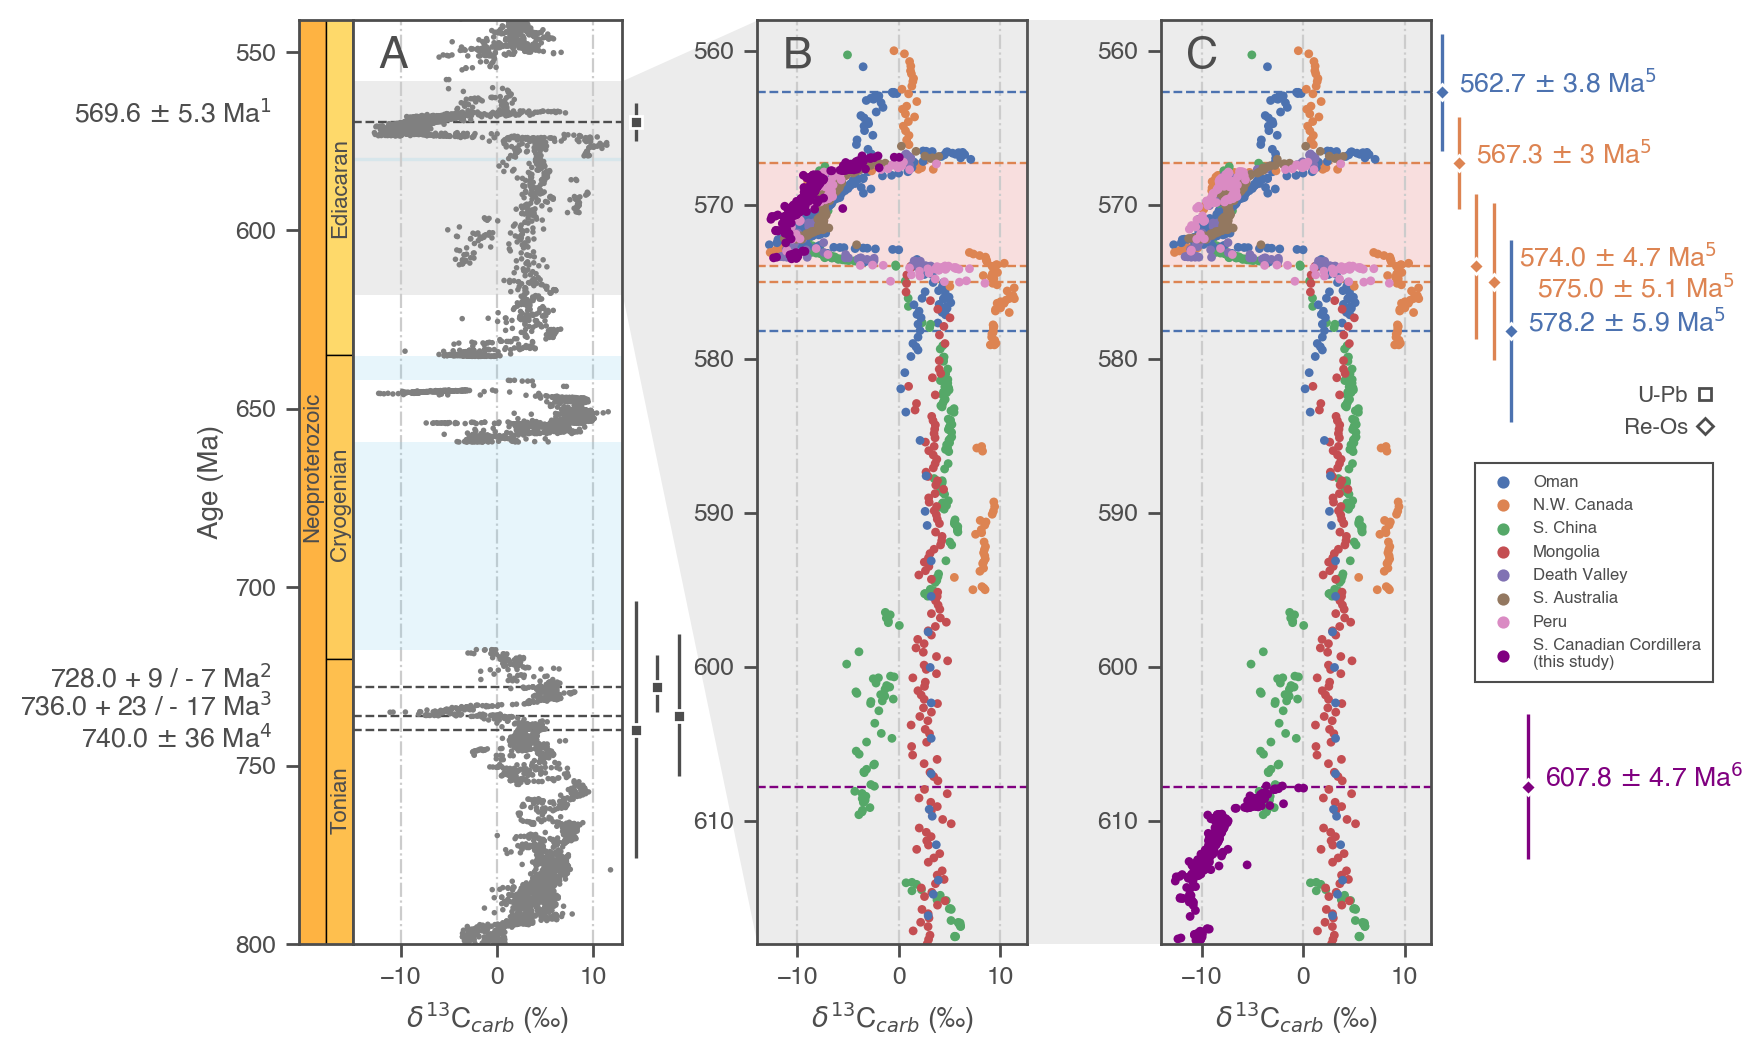

In [256]:
sns.set_context('paper')

fig,ax = plt.subplots(1,7,figsize=(8,6),width_ratios=(0.2,1,.5,1,.5,1,.4),sharey=False)
plt.subplots_adjust(wspace=0)

# carbon isotopes for neoproterozoic including ofp
sns.scatterplot(data=carb_targ,y='age',x='d13c',edgecolor='none',ax=ax[1],legend=False,zorder=2,clip_on=True,s=4,color='grey')

# carbon isotopes for ediacaran
sns.scatterplot(data=sub1,y='age',x='d13c',hue='locality',palette=cm,edgecolor='none',ax=ax[3],legend=True,zorder=2,clip_on=True,s=10)
sns.scatterplot(data=new_df_no_ofp,y='age',x='d13c',hue='locality',palette=cm1,edgecolor='none',ax=ax[5],legend=False,zorder=2,clip_on=True,s=10)
sns.scatterplot(data=new_df_ofp,y='new_age',x='d13c',color='purple',edgecolor='none',ax=ax[5],legend=False,zorder=2,clip_on=True,s=10)
# everything not shuram
#sns.scatterplot(data=subb,y='age',x='d13c',style='locality',edgecolor='none',ax=ax[3],legend=False,zorder=2,clip_on=True,s=10,color='darkgrey')

# highlight Shuram
ax[3].axhspan(574,567.3,alpha=0.15,zorder=0,color='tab:red',lw=0)
ax[5].axhspan(574,567.3,alpha=0.15,zorder=0,color='tab:red',lw=0)

# locality
leg = ax[3].legend(framealpha=1,fontsize=6,loc=3,markerscale=0.75,bbox_to_anchor=(2.65,0.28))
frame = leg.get_frame()
frame.set_edgecolor('.3')
frame.set_linewidth(.75)
frame.set_boxstyle('square')

# share axes
ax[0].invert_yaxis()
ax[3].invert_yaxis()
ax[0].set_ylim(800,541)
ax[1].sharey(ax[0])
ax[2].sharey(ax[1])
ax[4].sharey(ax[3])
ax[5].sharey(ax[4])
ax[6].sharey(ax[5])


#add GTS
h = 0.5
_ = addGTS(ax[0],name='international eras',size=h,pos=0.0,orientation='vertical',text=False,color=True)
ts = addGTS(ax[0],name='international periods',size=h,pos=h,orientation='vertical',text=False,color=True)

ax[3].set_ylabel(None)
ax[5].set_ylabel(None)
ax[1].xaxis.grid()
ax[3].xaxis.grid()
ax[5].xaxis.grid()

ax[0].set_xticks([])
ax[1].tick_params(axis='y', which='both',length=0)
ax[1].tick_params(labelleft=False)
ax[1].set_ylabel(None)
ax[0].set_ylabel('Age (Ma)',fontsize=10)

ax[2].axis('off')
ax[4].axis('off')
ax[6].axis('off')
ax[2].set_xlim(-1,1.5)
ax[4].set_xlim(-1,1.5)
ax[6].set_xlim(-1,1.5)

xlims=ax[1].get_xlim()
x1= -15
ax[1].set_xlim(x1,xlims[1])
ax[1].set_xlabel('$\delta^{13}$C$_{carb}$ (‰)',fontsize=10)
ax[3].set_xlabel('$\delta^{13}$C$_{carb}$ (‰)',fontsize=10)
ax[5].set_xlabel('$\delta^{13}$C$_{carb}$ (‰)',fontsize=10)

ax[3].set_ylim(blim,tlim)
ax[1].axhspan(ax[3].get_ylim()[0],ax[3].get_ylim()[1],alpha=0.15,zorder=0,color='grey',lw=0)
ax[3].axhspan(ax[3].get_ylim()[0],574,alpha=0.15,zorder=0,color='grey',lw=0) 
ax[3].axhspan(567.3,ax[3].get_ylim()[1],alpha=0.15,zorder=0,color='grey',lw=0)
ax[4].axhspan(ax[3].get_ylim()[0],ax[3].get_ylim()[1],alpha=0.15,zorder=0,color='grey',lw=0)
ax[5].axhspan(ax[3].get_ylim()[0],574,alpha=0.15,zorder=0,color='grey',lw=0) 
ax[5].axhspan(567.3,ax[3].get_ylim()[1],alpha=0.15,zorder=0,color='grey',lw=0)

# {(age,(+/-sd,-sd,reference))}
# Windermere Ages (age,(+sd,-sd,reference,color))
wmc = '.3'
wma = {728.0:(9,7,2,wmc), # 1) Deserters Gneiss (Evenchick et al., 1984) - Ub TIMS zircon bulk fraction
       740.0:(36,np.nan,4,wmc), # 2) Monashee Complex (Parrish and Scammell, 1988) - U-Pb TIMS
       569.6:(5.3,np.nan,1,wmc), # Hamill Group (Colpron et al., 2002) - U-Pb TIMS zircon bulk fraction
       736.0:(23,17,3,wmc)} # malton complex Gneisses (McDonough, 1991) - U-PB TIMS

# Shuram Ages (Rooney et al., 2020)
oman = {562.7:(3.8,np.nan,5,cm[0]), # Oman - Re-Os
        578.2:(5.9,np.nan,5,cm[0])} # - Re-Os
        
nwc = {567.3:(3,np.nan,5,cm[1]), # NW Canada - Re-Os
       574.0:(4.7,np.nan,5,cm[1]), # - Re-Os
       575.0:(5.1,np.nan,5,cm[1])} # - Re-Os

ofp = {607.8:(4.7,np.nan,6,cm[-1])} # GSM Type, Kendall et al., 2004 - Re-Os

shur = {**oman,**nwc}
ages = {**wma,**oman,**nwc,**ofp}
ages = dict(sorted(ages.items()))
cmap = sns.color_palette('tab10',n_colors=len(ages)).as_hex()

# ages
offset = -0.75
offset1 = -0.75
for (key,val),c in zip(ages.items(),cmap):
    if key in shur.keys() or key in ofp.keys():
        ref = val[2] # reference
        m = 'D'
        lab = f'{key} $\pm$ {val[0]} Ma$^{{{ref}}}$'
        ax[3].axhline(y=key,alpha=1,ls='--',color=val[3],zorder=1,label=lab,lw=0.85)
        ax[5].axhline(y=key,alpha=1,ls='--',color=val[3],zorder=1,label=lab,lw=0.85)
        ax[6].errorbar(offset,key,yerr=val[0],marker=m,markersize=4,color=val[3],markeredgecolor='w')
        offset+=0.4
        to = offset+0.6 if key>570 and key < 578 else offset
        v0 = key+1 if key==575.0 else key
        ax[6].text(to,v0,lab,color=val[3],ha='left')
    
    elif key in wma.keys():
        ref = val[2] # reference
        m = 's'
        offset1 = offset1+ 0.4 if key in [728.0,736.0] else -0.75
        if key not in [728.0,736.0]:
            lab = f'{key} $\pm$ {val[0]} Ma$^{{{ref}}}$'
        else:
            lab = f'{key} + {val[0]} / - {val[1]} Ma$^{{{ref}}}$'
        ax[1].axhline(y=key,alpha=1,ls='--',color=val[3],zorder=1,label=lab,lw=0.85)
        yerr = [[val[0]],[val[1]]] if key in [728.0,736.0] else val[0]
        ax[2].errorbar(offset1,key,yerr=yerr,marker=m,markersize=4,color=val[3],markeredgecolor='w')
        v0 = key+5 if key==740.0 else key
        ax[0].text(-0.5,v0,lab,color=val[3],ha='right')

# label time periods
ax[0].text(0.065,0.44,'Neoproterozoic',rotation=90,transform=ax[0].transAxes,fontsize=8)
ax[0].text(0.575,0.42,'Cryogenian',rotation=90,transform=ax[0].transAxes,fontsize=8)
ax[0].text(0.575,0.77,'Ediacaran',rotation=90,transform=ax[0].transAxes,fontsize=8)
ax[0].text(0.585,0.125,'Tonian',rotation=90,transform=ax[0].transAxes,fontsize=8)

el = [ Line2D([0], [0],lw=0, marker='s', color='.3', label='U-Pb',markerfacecolor='none', markersize=4),
      Line2D([0], [0], lw=0,marker='D', color='.3', label='Re-Os',markerfacecolor='none', markersize=4)]
ax[6].legend(handles=el,loc=3,bbox_to_anchor=(1.6,0.525),frameon=False,fontsize=8,handletextpad=0.4,markerfirst=False,handlelength=0.75)

# label A,B
labs = ['A','B','C']
for i,j in zip([1,3,5],labs):
    x_text = 0.15
    y_text = 0.96
    ax[i].text(x_text,y_text,j,transform=ax[i].transAxes,va='center',ha='center',fontsize=16)#,bbox=dict(facecolor='w',edgecolor='.3',lw=1,mutation_aspect=1,boxstyle='square,pad=0.15'))
  
# indicate zoom in region
x = [-1,1.5]
y = [blim,ax[0].get_ylim()[0]]
ya = [tlim,ax[0].get_ylim()[1]]
ax[2].fill_between(x,y,ya,alpha=0.15,color='grey',lw=0,zorder=0)

# add snowballs
ax[1].axhspan(717.5,659.3,color='skyblue',alpha=0.2,lw=0,label='Sturtian glaciation')
ax[1].axhspan(642,635.3,color='skyblue',alpha=0.2,lw=0,label='Marinoan glaciation')
ax[1].axhline(580,color='skyblue',alpha=0.2,label='Gaskiers glaciation',zorder=0)

fig.savefig(fig_dir+'ages.pdf',format='pdf',bbox_inches='tight',transparent=True)

## To Do:
- [x] fix colours, are jarring at the moment **Content with it for now, may change later**
- [x] make sure only the localities shown in panel B are in legend
- [x] split b into two subplots one with higher zoom for Shuram, and the other to show where the 607.8 age and discrepency (**Doesn't really work with errorbars hidden behind some subplots**)
- [x] add peru into comp (busch)
- [x] consider cleaning up the ofp dataset I have integrated here and only show a representative section for the TLM (seems to be what jon and everyone has done for each locality, i.e. just pick temple lake or wolverine or something) **Content with it for now, may change later**
- [ ] should really split the TLM data into a lower nardir part and a rising limb part and scale each individually

## Version with panel B split into two vertical plots to zoom on Shuram

In [ ]:
# #fig,ax = plt.subplots(1,5,figsize=(5.5,6),width_ratios=(0.2,1,.5,1,.4),sharey=False)
# fig,ax = plt.subplot_mosaic(
#     """
#     ABCDE
#     ABCDE
#     ABCDE
#     ABCDE
#     ABCFF
#     ABCGH
#     """,figsize=(5.5,6),width_ratios=(0.2,1,.5,1,.4),height_ratios=(1,1,1,1,.1,1),sharey=False)
# axs = list(ax.keys())
# plt.subplots_adjust(wspace=0,hspace=0)

# carb_targ = total_comp

# # carbon isotopes for neoproterozoic including ofp
# sns.scatterplot(data=carb_targ,y='age',x='d13c',edgecolor='none',ax=ax[axs[1]],legend=False,zorder=2,clip_on=True,s=4)
# # carbon isotopes for ediacaran
# tlim = 558
# blim = 615
# shurmin = 567.3-buf
# shurmax = 574+buf
# buf = 5 # extra data on either side of the Shuram
# sh = carb_targ[(carb_targ['age']>shurmin)&(carb_targ['age']<shurmax)] # isolate shuram
# sub = carb_targ[~((carb_targ['age']>567)&(carb_targ['age']<574))] # everything else
# subb = sub.loc[((carb_targ['age']>tlim)&(carb_targ['age']<blim))] # everything else but without data outside of plot
# sub1 = carb_targ[(carb_targ['age']<blim)&(carb_targ['age']>tlim)]

# # plot ediacaran
# sns.scatterplot(data=sh,y='age',x='d13c',hue='locality',palette=cm,edgecolor='none',ax=ax[axs[3]],legend=False,zorder=2,clip_on=True,s=10)
# #sns.scatterplot(data=sh,y='age',x='d13c',style='locality',edgecolor='none',ax=ax[axs[3]],legend=False,zorder=2,clip_on=True,s=10,color='#ae2012')

# # highlight Shuram
# ax[axs[3]].axhspan(574,567.3,alpha=0.15,zorder=0,color='tab:red',lw=0)

# # locality
# #leg = ax[axs[3]].legend(framealpha=1,fontsize=6,loc=3,markerscale=0.75,bbox_to_anchor=(1.1,0.22))
# frame = leg.get_frame()
# frame.set_edgecolor('.3')
# frame.set_linewidth(.75)
# frame.set_boxstyle('square')

# # share axes
# ax[axs[0]].invert_yaxis()
# ax[axs[3]].invert_yaxis()
# ax[axs[0]].set_ylim(800,541)
# ax[axs[1]].sharey(ax[axs[0]])
# ax[axs[2]].sharey(ax[axs[1]])
# ax[axs[4]].sharey(ax[axs[3]])
# ax[axs[7]].sharex(ax[axs[3]])

# #add GTS
# h = 0.5
# _ = addGTS(ax[axs[0]],name='international eras',size=h,pos=0.0,orientation='vertical',text=False,color=True)
# ts = addGTS(ax[axs[0]],name='international periods',size=h,pos=h,orientation='vertical',text=False,color=True)

# ax[axs[3]].set_ylabel(None)
# ax[axs[1]].xaxis.grid()
# ax[axs[3]].xaxis.grid()
# ax[axs[-2]].xaxis.grid()


# ax[axs[0]].set_xticks([])
# ax[axs[1]].tick_params(axis='y', which='both',length=0)
# ax[axs[1]].tick_params(labelleft=False)
# ax[axs[3]].set_xticklabels([])
# ax[axs[3]].set_xlabel(None)
# ax[axs[1]].set_ylabel(None)
# ax[axs[0]].set_ylabel('Age (Ma)',fontsize=10)

# ax[axs[2]].axis('off')
# ax[axs[4]].axis('off')
# ax[axs[5]].axis('off')
# ax[axs[7]].axis('off')
# # ax[axs[-1]].axis('off')

# ax[axs[2]].set_xlim(-1,1.5)
# ax[axs[4]].set_xlim(-1,1.5)

# xlims=ax[axs[1]].get_xlim()
# x1= -15
# ax[axs[1]].set_xlim(x1,xlims[1])
# ax[axs[1]].set_xlabel('$\delta^{13}$C$_{carb}$ (‰)',fontsize=10)
# ax[axs[-2]].set_xlabel('$\delta^{13}$C$_{carb}$ (‰)',fontsize=10)

# #ax[axs[3]].set_ylim(blim,tlim)
# ax[axs[1]].axhspan(ax[axs[3]].get_ylim()[0],ax[axs[3]].get_ylim()[1],alpha=0.15,zorder=0,color='grey',lw=0)
# #ax[axs[3]].axhspan(ax[axs[3]].get_ylim()[0],574,alpha=0.15,zorder=0,color='grey',lw=0) 
# #ax[axs[3]].axhspan(567.3,ax[axs[3]].get_ylim()[1],alpha=0.15,zorder=0,color='grey',lw=0)

# # {(age,(+/-sd,-sd,reference))}
# # Windermere Ages (age,(+sd,-sd,reference,color))
# wma = {728.0:(9,7,2,cm[-1]), # 1) Deserters Gneiss (Evenchick et al., 1984) - Ub TIMS zircon bulk fraction
#        740.0:(36,np.nan,4,cm[-1]), # 2) Monashee Complex (Parrish and Scammell, 1988) - U-Pb TIMS
#        569.6:(5.3,np.nan,1,cm[-1]), # Hamill Group (Colpron et al., 2002) - U-Pb TIMS zircon bulk fraction
#        736.0:(23,17,3,cm[-1])} # malton complex Gneisses (McDonough, 1991) - U-PB TIMS

# # Shuram Ages (Rooney et al., 2020)
# oman = {562.7:(3.8,np.nan,5,cm[0]), # Oman - Re-Os
#         578.2:(5.9,np.nan,5,cm[0])} # - Re-Os
        
# nwc = {567.3:(3,np.nan,5,cm[1]), # NW Canada - Re-Os
#        574.0:(4.7,np.nan,5,cm[1]), # - Re-Os
#        575.0:(5.1,np.nan,5,cm[1])} # - Re-Os

# ofp = {607.8:(4.7,np.nan,6,cm[-1])} # GSM Type, Kendall et al., 2004 - Re-Os

# shur = {**oman,**nwc}
# ages = {**wma,**oman,**nwc,**ofp}
# ages = dict(sorted(ages.items()))
# cmap = sns.color_palette('tab10',n_colors=len(ages)).as_hex()

# # ages
# offset = -0.75
# offset1 = -0.75
# for (key,val),c in zip(ages.items(),cmap):
#     if key in shur.keys(): #or key in ofp.keys():
#         ref = val[2] # reference
#         m = 'D'
#         lab = f'{key} $\pm$ {val[0]} Ma$^{{{ref}}}$'
#         ax[axs[3]].axhline(y=key,alpha=1,ls='--',color=val[3],zorder=1,label=lab,lw=0.85)
#         ax[axs[4]].errorbar(offset,key,yerr=val[0],marker=m,markersize=4,color=val[3],markeredgecolor='.3')
#         offset+=0.4
#         to = offset+0.6 if key>570 and key < 578 else offset
#         v0 = key+1 if key==575.0 else key
#         ax[axs[4]].text(to,v0,lab,color=val[3],ha='left')
    
#     elif key in wma.keys():
#         ref = val[2] # reference
#         m = 's'
#         offset1 = offset1+ 0.4 if key in [728.0,736.0] else -0.75
#         if key not in [728.0,736.0]:
#             lab = f'{key} $\pm$ {val[0]} Ma$^{{{ref}}}$'
#         else:
#             lab = f'{key} + {val[0]} / - {val[1]} Ma$^{{{ref}}}$'
#         ax[axs[1]].axhline(y=key,alpha=1,ls='--',color=val[3],zorder=1,label=lab,lw=0.85)
#         yerr = [[val[0]],[val[1]]] if key in [728.0,736.0] else val[0]
#         ax[axs[2]].errorbar(offset1,key,yerr=yerr,marker=m,markersize=4,color=val[3],markeredgecolor='.3')
#         v0 = key+5 if key==740.0 else key
#         ax[axs[0]].text(-0.5,v0,lab,color=val[3],ha='right')

# # label time periods
# ax[axs[0]].text(0.065,0.44,'Neoproterozoic',rotation=90,transform=ax[axs[0]].transAxes,fontsize=8)
# ax[axs[0]].text(0.575,0.44,'Cryogenian',rotation=90,transform=ax[axs[0]].transAxes,fontsize=8)
# ax[axs[0]].text(0.575,0.77,'Ediacaran',rotation=90,transform=ax[axs[0]].transAxes,fontsize=8)
# ax[axs[0]].text(0.585,0.125,'Tonian',rotation=90,transform=ax[axs[0]].transAxes,fontsize=8)

# #ax[axs[3]].set_ylim(shurmax,shurmin)

# el = [ Line2D([0], [0],lw=0, marker='s', color='.3', label='U-Pb',markerfacecolor='none', markersize=4),
#       Line2D([0], [0], lw=0,marker='D', color='.3', label='Re-Os',markerfacecolor='none', markersize=4)]
# ax[axs[4]].legend(handles=el,loc=3,bbox_to_anchor=(0.28,0.45),frameon=False,fontsize=8,handletextpad=0.4,markerfirst=True,handlelength=0.75)

# # label A,B
# labs = ['A','B']
# for i,j in zip([axs[1],axs[3]],labs):
#     x_text = 0.15
#     y_text = 0.96
#     ax[i].text(x_text,y_text,j,transform=ax[i].transAxes,va='center',ha='center',fontsize=16,bbox=dict(facecolor='w',edgecolor='.3',lw=1,mutation_aspect=1,boxstyle='square,pad=0.15'))
  
# # indicate zoom in region
# x = [-1,1.5]
# y = [blim,ax[axs[0]].get_ylim()[0]]
# ya = [tlim,ax[axs[0]].get_ylim()[1]]
# ax[axs[2]].fill_between(x,y,ya,alpha=0.15,color='grey',lw=0,zorder=0)

# # add snowballs
# ax[axs[1]].axhspan(717.5,659.3,color='skyblue',alpha=0.2,lw=0,label='Sturtian glaciation')
# ax[axs[1]].axhspan(642,635.3,color='skyblue',alpha=0.2,lw=0,label='Marinoan glaciation')
